<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/04pln/clase_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Procesamiento del Lenguaje Natural (PLN) - Slides 47 a 60

Este documento explica en profundidad los contenidos presentados en las diapositivas 47 a 60 del capítulo 7 sobre PLN, junto con ejercicios prácticos en Python.

---

## 1. Flujo de trabajo en PLN

El pipeline estándar del PLN incluye:

1. **Adquisición de datos**: recopilación de corpus (textos).
2. **Preprocesamiento**: limpieza del texto (tokenización, stopwords, lematización).
3. **Modelado**: representación del texto (TF-IDF, embeddings).
4. **Aprendizaje automático**: entrenamiento de modelos de clasificación, etiquetado, etc.
5. **Despliegue**: puesta en producción del modelo.
6. **EDA (Exploración de datos)**: análisis transversal del texto antes y después del preprocesamiento.

---


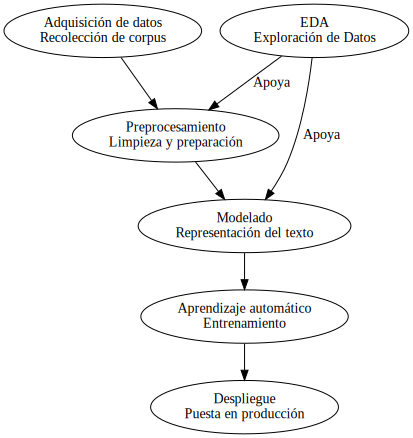

In [1]:
!pip install graphviz

from graphviz import Digraph

dot = Digraph()

dot.node('A', 'Adquisición de datos\nRecolección de corpus')
dot.node('B', 'Preprocesamiento\nLimpieza y preparación')
dot.node('C', 'Modelado\nRepresentación del texto')
dot.node('D', 'Aprendizaje automático\nEntrenamiento')
dot.node('E', 'Despliegue\nPuesta en producción')
dot.node('F', 'EDA\nExploración de Datos')

dot.edges(['AB', 'BC', 'CD', 'DE'])
dot.edge('F', 'B', label='Apoya')
dot.edge('F', 'C', label='Apoya')

dot.render('pln_flowchart', format='png', cleanup=False)
dot



## 2. Comprensión vs. Generación

- **NLU (Natural Language Understanding)**: entender el lenguaje.
  - Ej: análisis de sentimientos, NER, clasificación.
- **NLG (Natural Language Generation)**: generar texto.
  - Ej: respuestas automáticas, generación de resúmenes.




# Comprensión vs. Generación en Procesamiento del Lenguaje Natural (PLN)

Este documento explica en detalle las diferencias entre NLU y NLG, dos grandes ramas del PLN, con ejemplos prácticos en Python.

---

## Natural Language Understanding (NLU)

### ¿Qué es?

NLU se enfoca en **entender** el texto natural. Busca interpretar el significado, contexto, intención y estructura gramatical.

---

### Componentes clave

- **Tokenización y análisis morfológico**
- **Etiquetado gramatical (POS tagging)**
- **Reconocimiento de entidades nombradas (NER)**
- **Análisis de sentimientos**
- **Desambiguación semántica**
- **Detección de intención**

---

### Ejemplo en Python (con spaCy)

```python
!pip install spacy
!python -m spacy download es_core_news_md

import spacy

nlp = spacy.load("es_core_news_md")
texto = "Michael viajará a Santiago el próximo lunes."

doc = nlp(texto)

# Tokenización y etiquetas gramaticales
for token in doc:
    print(token.text, token.pos_)

# Entidades nombradas
for ent in doc.ents:
    print(ent.text, ent.label_)
```

---

## Natural Language Generation (NLG)

### ¿Qué es?

NLG genera texto comprensible por humanos a partir de estructuras de datos o comandos.

---

### Etapas

1. **Content Planning**: qué decir
2. **Text Structuring**: cómo organizar
3. **Sentence Planning**: qué palabras usar
4. **Surface Realization**: producir texto final

---

### Aplicaciones

- Respuestas automáticas
- Traducción automática
- Resúmenes automáticos
- Reportes y narrativas de datos
- Autocompletado

---

### Ejemplo en Python (con Hugging Face GPT-2)

```python
!pip install transformers

from transformers import pipeline

generator = pipeline("text-generation", model="gpt2")

texto_inicial = "El futuro de la inteligencia artificial es"
resultado = generator(texto_inicial, max_length=40, num_return_sequences=1)
print(resultado[0]['generated_text'])
```

---

## Comparación entre NLU y NLG

| Aspecto       | NLU                                  | NLG                              |
|---------------|---------------------------------------|----------------------------------|
| Objetivo      | Entender e interpretar                | Generar y redactar               |
| Entrada       | Texto en lenguaje natural             | Datos estructurados o prompts    |
| Salida        | Estructuras, etiquetas, categorías    | Texto legible para humanos       |
| Ejemplos      | Clasificación, análisis de sentimientos | Resúmenes, respuestas automáticas |

---

## Ejercicio Propuesto

### Parte 1: NLU

Analiza la siguiente oración:

```python
texto = "El Galaxy S25 de Samsung es increíble."
```

- Extrae las entidades (producto, empresa).
- Determina el sentimiento (usando un modelo Hugging Face si se desea).

---

### Parte 2: NLG

Genera una oración que diga:

> El producto Galaxy S25 de Samsung ha sido calificado como increíble.

Puedes practicar con plantillas o con modelos preentrenados.


---

## 3. Tareas de PLN

- **Tokenización**: separar texto en unidades (palabras, frases).
- **Etiquetado gramatical (POS tagging)**: asignar categoría gramatical a cada palabra.
- **Reconocimiento de entidades nombradas (NER)**: detectar nombres de personas, lugares, etc.
- **Parsing**: análisis sintáctico.
- **Resolución de correferencias**: identificar a qué refiere un pronombre.

### Ejercicio en Python
```python
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

texto = "Envíale un mensaje a Michael diciéndole que llegaré tarde a la reunión."
tokens = word_tokenize(texto)
print(tokens)
```

---

## 4. Etiquetado gramatical y ambigüedad

El POS tagging puede requerir contexto para decidir el rol gramatical.

### Ejercicio en Python
```python
nltk.download('averaged_perceptron_tagger')
tags = nltk.pos_tag(tokens)
print(tags)
```

---

## 5. Probabilidad léxica y contextual

- **P(POS | palabra)**: probabilidad de que una palabra tenga una categoría.
- **P(POS₂ | POS₁)**: probabilidad de una categoría dada la anterior.

La categoría más probable se selecciona como aquella que maximiza el producto de ambas probabilidades.

---

## 6. Aprendizaje profundo en PLN

Modelos basados en redes neuronales (como RNN o Transformers) capturan contexto de toda la oración y no solo de palabras individuales.

Esto mejora tareas como:

- Traducción automática
- Resumen de texto
- Respuesta a preguntas

---

## 7. Datos secuenciales

Los textos son datos secuenciales. El orden importa.

Otros ejemplos:

- Audio
- ECG
- ADN
- Series de tiempo

---

## 8. Corpus

Un corpus es una colección de textos usada para análisis o entrenamiento.

### Ejercicio en Python
```python
from nltk.corpus import gutenberg
nltk.download('gutenberg')

corpus_text = gutenberg.raw('austen-emma.txt')
print(corpus_text[:300])
```

---

## 9. Tokenización avanzada

### NLTK
```python
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

texto = "Hola. Esto es un ejemplo. Contiene varias oraciones."
print(sent_tokenize(texto))
```

### Keras
```python
from keras.preprocessing.text import text_to_word_sequence

secuencia = text_to_word_sequence("La casa es bonita, pero está vacía.")
print(secuencia)
```

---

## Actividades sugeridas

1. Tokenizar el texto completo de un corpus (como `austen-emma.txt`) y contar las palabras.
2. Realizar POS tagging y contar cuántos verbos hay.
3. Crear un modelo simple de clasificación de textos con TF-IDF + Naive Bayes (usando `sklearn`).
4. Implementar una visualización básica de frecuencia de palabras usando `matplotlib`.


In [ ]:
# https://www.nltk.org/book/

In [ ]:
# https://www.researchgate.net/publication/220691633_Natural_Language_Processing_with_Python

In [ ]:
# https://jalammar.github.io/illustrated-transformer/